In [1]:
#IMPORTING THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_excel('Tickets.xlsx')

In [3]:
raw_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
raw_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#Creating a duplicate of the data

data = raw_data.copy()

In [7]:
data[data['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
data.dropna(inplace= True)

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<h4>Data Cleaning and featurization<h4>

In [10]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [11]:
#Performing featurization on date columns. Converting the datatype to Timestamp instead of object

def convert_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [12]:
for features in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_into_datetime(features)

<h3> Data Preprocessing </h3>

In [13]:
# Performing featurization on Date of Journey. Defining a function that splits the column into year, Month and day column.
# And also dropping the main column

def get_Year_Month_Day (col):
    data['Year of Journey'] = data[col].dt.year
    data['Month of Journey'] = data[col].dt.month
    data['Day of Journey'] = data[col].dt.day

In [14]:
get_Year_Month_Day('Date_of_Journey')

In [15]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year of Journey,Month of Journey,Day of Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-06-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24


In [16]:
data.drop('Date_of_Journey', axis = 1, inplace = True)

In [17]:
# Defining a function that creates columns for Departure hour and minute, whilst dropping the Dep_Time column

def get_hour_minutes (df, col):
    df[col + '_hour'] = df[col].dt.hour
    df[col + '_minutes'] = df[col].dt.minute
    df.drop(col, axis = 1, inplace = True)
    return df.head(2)

In [18]:
get_hour_minutes(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year of Journey,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-15 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50


In [19]:
get_hour_minutes(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year of Journey,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [20]:
# Defining a function that converts the values of the Departure hour to Midnight, morning and Night.

def flight_dep_time(x):
    if (x > 0) and (x <= 4):
        return 'Midnight'
    elif (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Afternoon'
    elif (x > 16) and (x <= 20):
        return 'Evening'
    else:
        return 'Night'

In [21]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Afternoon        1731
Night            1080
Midnight          425
Name: Dep_Time_hour, dtype: int64

In [22]:
# Preprocessing Duration
# Balancing the column by replacing the row without hour with '0h' and the one without minutes as '0m'

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h ' + x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [23]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [24]:
#Splitting hours and minutes and getting just the value

#int(data['Duration'][0].split(' ')[0][0:-1])

In [25]:
#int(data['Duration'][0].split(' ')[1][0:-1])

In [26]:
data['duration_hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [27]:
data['duration_minutes'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [28]:
#Calculating the total duration in minutes

data['duration_total_mins'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [29]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year of Journey,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15,7,25,445


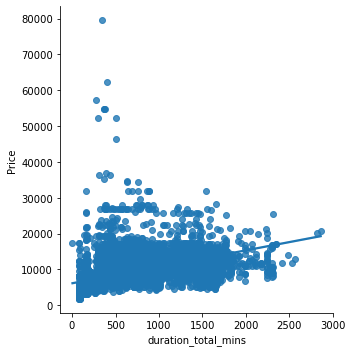

In [31]:
#Analyzing to see whether duration impacts price or not

sns.lmplot(x='duration_total_mins', y='Price', data=data)

This scatterplot implies that there is a relationship between the flight's duration and the price

<AxesSubplot:ylabel='Destination'>

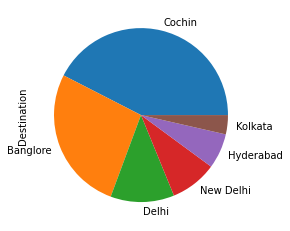

In [32]:
#Visualizing the city with the maximum destination

data['Destination'].value_counts().plot(kind='pie')

<h3> Analyzing the most used Airline </h3>

In [33]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
#Analyzing the most used route of Jet Airways Airline

data[data['Airline'] =='Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

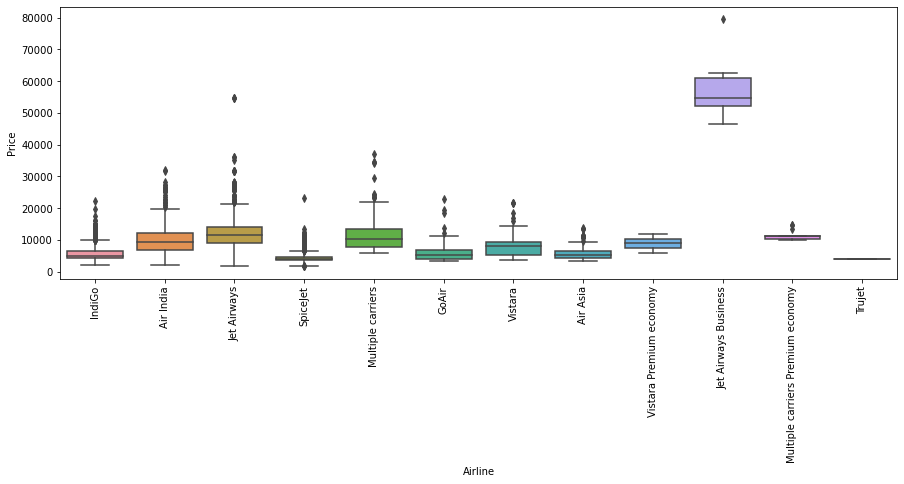

In [36]:
#Visualizing the distribution of Airlines and it's prices

plt.figure(figsize = (15,5))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation='vertical')

In [37]:
# Analyzing 'Additional Info' column
np.round(data['Additional_Info'].value_counts()/len(data)*100,1)

No info                         78.1
In-flight meal not included     18.6
No check-in baggage included     3.0
1 Long layover                   0.2
Change airports                  0.1
Business class                   0.0
No Info                          0.0
1 Short layover                  0.0
Red-eye flight                   0.0
2 Long layover                   0.0
Name: Additional_Info, dtype: float64

The Analyses above implies that the 78% of the data in the feature contains data with no information.
Hence, the feature is irrelevant and will be dropped.

In [38]:
data.drop(columns =['Additional_Info', 'Route', 'duration_total_mins', 'Year of Journey'], axis = 1, inplace = True)

In [39]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25


<h4> Feature Encoding </h4>

In [40]:
#Categorical Features
cat_col = [col for col in data.columns if data[col].dtype == object]

In [41]:
# Numerical Features
num_col = [col for col in data.columns if data[col].dtype != object]

In [42]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [43]:
num_col

['Price',
 'Month of Journey',
 'Day of Journey',
 'Dep_Time_hour',
 'Dep_Time_minutes',
 'Arrival_Time_hour',
 'Arrival_Time_minutes',
 'duration_hours',
 'duration_minutes']

In [44]:
# Creating dummy variables for source feature
for category in data['Source'].unique():
    data['Source' + '_'+ category] = data['Source'].apply(lambda x : 1 if x ==category else 0)
    
    
# OR
#cat = pd.get_dummies(data['Source'], prefix='Source', drop_first=True)


In [45]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


<h4> Applying target guided encoding </h4>

<h4> Airline </h4>

In [46]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [47]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [48]:
dict1 = {key:index for index, key in enumerate (airlines, 0)}

In [49]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [50]:
data['Airline'] = data['Airline'].map(dict1)

In [51]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


<h4> Destination </h4>

In [52]:
# Treating the Delhi and New Delhi destination as one. Cause they have similar destination
data['Destination'].replace('New Delhi', 'Delhi', inplace = True)

In [53]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [54]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [55]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [56]:
dict2 = {key:index for index, key in enumerate (dest, 0)}

In [57]:
data['Destination'] = data['Destination'].map(dict2)

In [58]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


<h4> Total_stops </h4>

Manual Encoding

In [59]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [60]:
stops = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}

In [61]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [62]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,9,6,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,1,3,16,50,21,35,4,45,1,0,0,0,0


<h4> Dealing with Outliers </h4>

In [65]:
def plot(df, col):
    fig,(ax1,ax2,ax3) =plt.subplots(3, 1)
    sns.distplot(df[col], ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col], ax=ax3, kde=False)

D:\RUTH\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\RUTH\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\RUTH\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Future

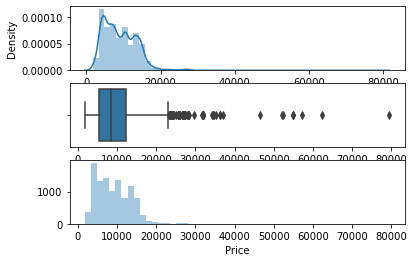

In [66]:
plot(data, 'Price')

In [67]:
# Outlier from 35000. Replace outlier with it's mean
data['Price'] = np.where(data['Price']>=35000, data['Price'].median(), data['Price'])

D:\RUTH\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\RUTH\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


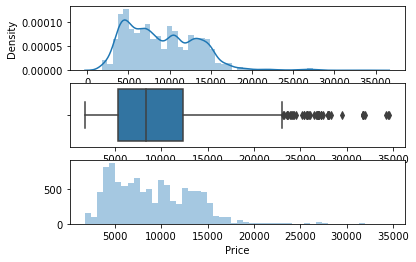

In [68]:
plot(data, 'Price')

In [69]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month of Journey,Day of Journey,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,duration_hours,duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,3,24,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [70]:
data.drop(columns =['Source', 'Duration'], axis=1, inplace=True)

In [71]:
data.dtypes

Airline                   int64
Destination               int64
Total_Stops               int64
Price                   float64
Month of Journey          int64
Day of Journey            int64
Dep_Time_hour             int64
Dep_Time_minutes          int64
Arrival_Time_hour         int64
Arrival_Time_minutes      int64
duration_hours            int64
duration_minutes          int64
Source_Banglore           int64
Source_Kolkata            int64
Source_Delhi              int64
Source_Chennai            int64
Source_Mumbai             int64
dtype: object

<h4> Exporting the preprocessed data </h4>

In [72]:
data.to_csv('Ticket_data_preprocessed.csv', index = False)